In [1]:
%load_ext autoreload
%autoreload 2

from https://www.microscopyu.com/microscopy-basics/properties-of-microscope-objectives 

100x oil: NA = 1.4 

60x air: NA = 0.95 

40x air: NA = 0.95 

20x air: NA = 0.7 

10x air: NA = 0.45 

4x air: NA = 0.2 

2x air: NA = 0.1 

In [2]:
# import sys
# sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tifffile
from scipy.signal import savgol_filter
import pickle

c:\Users\robho\OneDrive\Desktop\Uni_Work\Year_4\project2\SyMBac\cell_simulation.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
for image in get_sample_images():
    print(get_sample_images()[image].shape)
    print(image)

(256, 46)
E. coli 100x
(256, 46)
E. coli 100x stationary
(256, 32)
E. coli DeLTA
(256, 46)
E. coli 100x fluorescence


In [4]:
from SyMBac.misc import interpolate
from scipy.ndimage import gaussian_filter
from SyMBac.drawing import make_images_same_shape

# 100x

In [5]:
pmcs = np.array([1,10/6,10/4,10/3.5,10/3,10/2.5,10/2,10/1])*0.0655
pmcs = np.array([1, 9/6, 9/4, 9/3, 9/2])*0.0728

In [6]:
my_simulation = Simulation(
    trench_length=13.9,
    trench_width=1.4,
    cell_max_length=5, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = pmcs[0],
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C://Users//robho//OneDrive//Desktop//Uni_Work//Year_4//project2",
    resize_amount = 3,
    objective=90
)

In [7]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

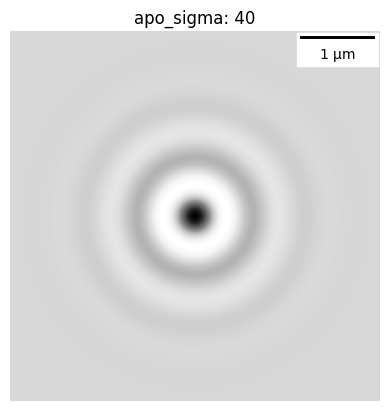

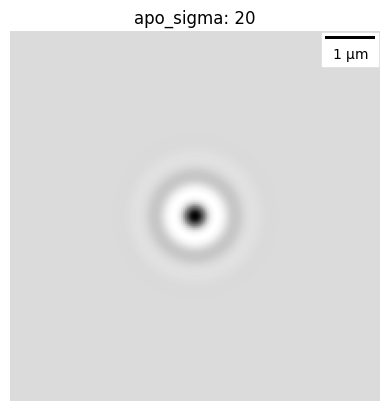

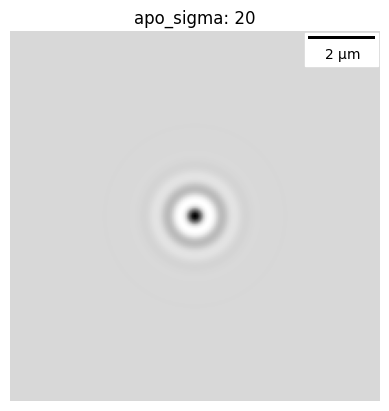

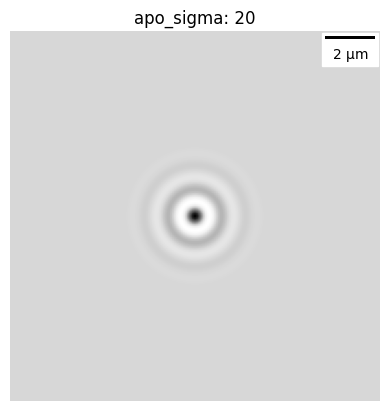

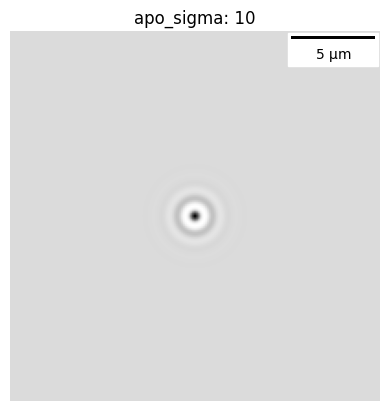

In [9]:
# A 2D phase contrast kernel
kern_list = []
for radius, sig, pmc, na, n, condenser in [[100,40,pmcs[0],0.95,1,"Ph3"],[100,20,pmcs[1],0.95,1,"Ph2"],
                                           [100,20,pmcs[2],0.95,1,"Ph2"],[100,20,pmcs[3],0.7,1,"Ph1"],[100,10,pmcs[4],0.7,1,"Ph1"]]: #,[100,10,pmcs[-2],0.75,1,"Ph3"]]:
    my_kernel = PSF_generator(
        radius = radius,
        wavelength = 0.6,
        NA = na,
        n = n,
        resize_amount = 3,
        pix_mic_conv = pmc,
        apo_sigma = sig,
        mode="phase contrast",
        condenser = condenser)
    kern_list.append(my_kernel)
    my_kernel.calculate_PSF()
    my_kernel.plot_PSF()

In [10]:
# real_image60 = interpolate(gaussian_filter(real_image,sigma=1.5),(int(real_image.shape[0]*6/10),int(real_image.shape[1]*6/10)))
# real_image40 = interpolate(gaussian_filter(real_image,sigma=2),(int(real_image.shape[0]*4/10),int(real_image.shape[1]*4/10)))
# real_image_list = [real_image, real_image60, real_image40] #, real_image20]

# image_folder = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/real_images/"
# real_images = [tifffile.imread(image_folder+file) for file in os.listdir(image_folder)]

In [11]:
with open('pickle_files/pickle_real_image_list.pkl', 'rb') as inp:
    real_image_list = pickle.load(inp)

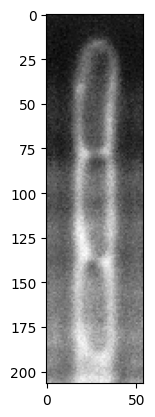

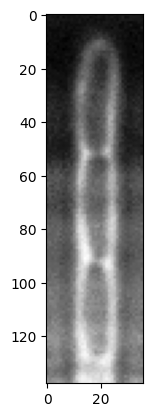

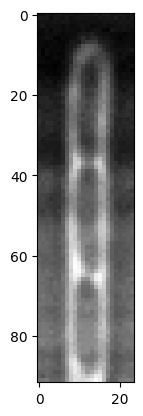

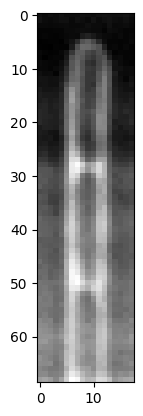

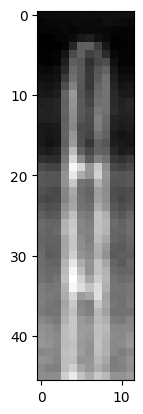

In [27]:
for i in range(5):
    plt.imshow(real_image_list[i],cmap="Greys_r")
    plt.show()

In [12]:
# k1 = 1649
# l1 = 1200
# k2 = 1473
# l2 = 1180
# k3 = 1675
# l3 = 1161
# k4 = 1490
# l4 = 1158
# k5 = 1221
# l5 = 912
# k6 = 1159
# l6 = 1165
# ks = [k1,k2,k3,k4,k5,k6]
# ls = [l1,l2,l3,l4,l5,l6]
# dks = [54,36,36,24,18,12]
# dls = [207,138,138,92,69,46]
# real_image_list = [real_images[-i-1][::-1][ls[i]:ls[i]+dls[i],ks[i]:ks[i]+dks[i]][::-1] for i in range(len(real_images))]

In [13]:
# fig, axs = plt.subplots(1,3,figsize = (6,6))
# axs[0].pcolor(real_image[::-1],cmap="Greys_r")
# axs[0].set_title("real image 100")
# axs[1].pcolor(real_image60[::-1],cmap="Greys_r")
# axs[1].set_title("downsampled 60")
# axs[2].pcolor(real_image40[::-1],cmap="Greys_r")
# axs[2].set_title("downsampled 40")
# # axs[3].pcolor(real_image20[::-1],cmap="Greys_r")
# # axs[3].set_title("downsampled 20")
# fig.tight_layout()
# plt.show()

In [14]:
my_renderer = Renderer(simulation=my_simulation, 
                       PSF_list = kern_list, 
                       real_image_list = real_image_list)

In [15]:
# ml = np.array(pd.read_csv("csv_files/media_label.csv",header=None))
# cl = np.array(pd.read_csv("csv_files/cell_label.csv",header=None))
# dl = np.array(pd.read_csv("csv_files/device_label.csv",header=None))

In [16]:
with open('pickle_files/pickle_media_label_list.pkl', 'rb') as inp:
    media_list1 = pickle.load(inp)

with open('pickle_files/pickle_device_label_list.pkl', 'rb') as inp:
    device_list1 = pickle.load(inp)

with open('pickle_files/pickle_cell_label_list.pkl', 'rb') as inp:
    cell_list1 = pickle.load(inp)

In [17]:
my_renderer.select_intensity_napari(media_list1,cell_list1,device_list1)

In [18]:
# media_list  = [m.data for m in my_renderer.media_label_list]
# device_list = [d.data for d in my_renderer.device_label_list]
# cell_list   = [c.data for c in my_renderer.cell_label_list]

In [19]:
# with open('pickle_files/pickle_real_image_list.pkl', 'wb') as outp:
#     pickle.dump(real_image_list, outp, pickle.HIGHEST_PROTOCOL)

In [20]:
# with open('pickle_files/pickle_media_label_list.pkl', 'wb') as outp:
#     pickle.dump(media_list1, outp, pickle.HIGHEST_PROTOCOL)


# with open('pickle_files/pickle_device_label_list.pkl', 'wb') as outp:
#     pickle.dump(device_list1, outp, pickle.HIGHEST_PROTOCOL)


# with open('pickle_files/pickle_cell_label_list.pkl', 'wb') as outp:
#     pickle.dump(cell_list1, outp, pickle.HIGHEST_PROTOCOL)

In [21]:
# with open('pickle_files/pickle_media_label_list.pkl', 'rb') as inp:
#     media_list1 = pickle.load(inp)

# with open('pickle_files/pickle_device_label_list.pkl', 'rb') as inp:
#     device_list1 = pickle.load(inp)

# with open('pickle_files/pickle_cell_label_list.pkl', 'rb') as inp:
#     cell_list1 = pickle.load(inp)

In [141]:
# pd.DataFrame(my_renderer.media_label.data).to_csv("csv_filesmedia_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.cell_label.data).to_csv("csv_filescell_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.device_label.data).to_csv("csv_filesdevice_label.csv",header=0,index=False)

In [142]:
def meanplusnoise(signal):
    mu = np.mean(signal)
    std = np.std(signal)
    return std*np.random.randn(len(signal)) + mu

def getab(signal):
    N = len(signal)
    x = np.arange(N)
    numerator = np.sum(x*signal) - np.sum(signal/N)*np.sum(x)
    denominator = np.sum(x**2) - np.sum(x)**2/N
    a = numerator/denominator
    b = np.mean(signal) - a*np.mean(x)
    return a, b, x, N

def linearfit(signal,return_noisy):
    a,b,x,N = getab(signal)
    fit = a*x+b
    if not return_noisy:
        return fit
    sigma = np.std(signal-fit)
    noise = sigma*np.random.randn(N)
    return fit + noise

def ARlinearfit(signal,gamma,noise_std):
    a,b,x,N = getab(signal)
    mu = a*x+b
    output = [mu[0]]
    for i in range(1,N):
        new = mu[i] + gamma*output[-1] + noise_std*np.random.randn()
        output.append(new)
    return output

def MSE(signal, fit):
    return np.mean((signal-fit)**2)

def rescale_intensity(image, max_val):
    current_max = np.max(image)
    return (image/current_max*max_val).astype(int)

In [33]:
my_renderer.optimise_synth_image(manual_update=False,adjust_background=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [32]:
my_renderer.save_params()

current length of params_list: 4


In [147]:
my_renderer.optimise_synth_image(manual_update=False,adjust_background=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [148]:
my_renderer.save_params()

current length of params_list: 2


In [149]:
image_params[2]

{'media_multiplier': 86,
 'cell_multiplier': 2.8999999999999986,
 'device_multiplier': -1,
 'sigma': 5.1923076923076925,
 'scene_no': 60,
 'match_fourier': False,
 'match_histogram': True,
 'match_noise': True,
 'debug_plot': True,
 'noise_var': 0.0003,
 'defocus': 2.6,
 'number': 3,
 'generate': False,
 'adjust_background': True}

In [150]:
my_renderer.optimise_synth_image(manual_update=False,adjust_background=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [151]:
my_renderer.save_params()

current length of params_list: 3


In [152]:
image_params[3]

{'media_multiplier': 93,
 'cell_multiplier': 2.549999999999997,
 'device_multiplier': 1,
 'sigma': 5.192307692307692,
 'scene_no': 60,
 'match_fourier': False,
 'match_histogram': True,
 'match_noise': True,
 'debug_plot': True,
 'noise_var': 0.0002,
 'defocus': 1.8,
 'number': 4,
 'generate': False,
 'adjust_background': True}

In [153]:
my_renderer.optimise_synth_image(manual_update=False,adjust_background=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [154]:
my_renderer.save_params()

current length of params_list: 4


In [155]:
image_params[4]

{'media_multiplier': 88,
 'cell_multiplier': 1.5,
 'device_multiplier': -62,
 'sigma': 5.192307692307693,
 'scene_no': 60,
 'match_fourier': False,
 'match_histogram': True,
 'match_noise': True,
 'debug_plot': True,
 'noise_var': 0.0,
 'defocus': 1.4,
 'number': 5,
 'generate': False,
 'adjust_background': True}

In [156]:
my_renderer.optimise_synth_image(manual_update=False,adjust_background=True)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [157]:
my_renderer.save_params()

current length of params_list: 5


In [158]:
len(my_renderer.adjusted_real_image_list)

5

In [162]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 1000, save_dir="superres/third_trial/omnipose_training/train", in_series=False,adjust_background=True)

Folder already exists: superres/third_trial/omnipose_training/train
Folder already exists: superres/third_trial/omnipose_training/train
Folder already exists: superres/third_trial/omnipose_training/train
Folder already exists: superres/third_trial/omnipose_training/train
Folder already exists: superres/third_trial/omnipose_training/train


Sample generation: 100%|██████████| 1000/1000 [1:59:49<00:00,  7.19s/it] 


In [163]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 200, save_dir="superres/third_trial/omnipose_training/test", in_series=False,adjust_background=True)


Folder already exists: superres/third_trial/omnipose_training/test
Folder already exists: superres/third_trial/omnipose_training/test
Folder already exists: superres/third_trial/omnipose_training/test
Folder already exists: superres/third_trial/omnipose_training/test
Folder already exists: superres/third_trial/omnipose_training/test


Sample generation: 100%|██████████| 200/200 [21:23<00:00,  6.42s/it]


In [164]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 200, save_dir="superres/third_trial/SR_training/test", in_series=False,adjust_background=True)


Folder already exists: superres/third_trial/SR_training/test
Folder already exists: superres/third_trial/SR_training/test
Folder already exists: superres/third_trial/SR_training/test
Folder already exists: superres/third_trial/SR_training/test
Folder already exists: superres/third_trial/SR_training/test


Sample generation: 100%|██████████| 200/200 [21:23<00:00,  6.42s/it]


# 10x

In [ ]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

In [ ]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [63]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.65,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C://Users//robho//OneDrive//Desktop//Uni_Work//Year_4//project2",
    resize_amount = 3
)

In [64]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [65]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

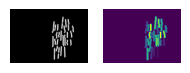

In [66]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

In [59]:
some = [[],[],[]]

In [60]:
some[1].append(5)

In [61]:
some

[[], [5], []]

In [62]:
some.append([])

In [63]:
some

[[], [5], [], []]

In [13]:
from interpolate import linear_interpolate
import numpy as np
import matplotlib.pyplot as plt

In [3]:
array = np.random.randn(102,18)

In [4]:
%%timeit
out = linear_interpolate(array,(256,46),method='linear')

597 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%%timeit
out = linear_interpolate(array,(256,46),method='cubic')

1.55 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
array = np.random.randn(256,46)

In [7]:
%%timeit
linear_interpolate(array,(256,46),method='linear')

3.66 µs ± 54.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
linear_interpolate(array,(256,46),method='cubic')

3.75 µs ± 97.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
some = ["aaa","bbb","bcc"]
"*cc" in some

False

In [27]:
arr = np.ones([4,1,256,46])
arr[1] *= 2
arr[2] *= 3
arr[3] *= 4

In [31]:
arr2 = arr.reshape([46*4,256]).T

In [32]:
arr2.shape

(256, 184)

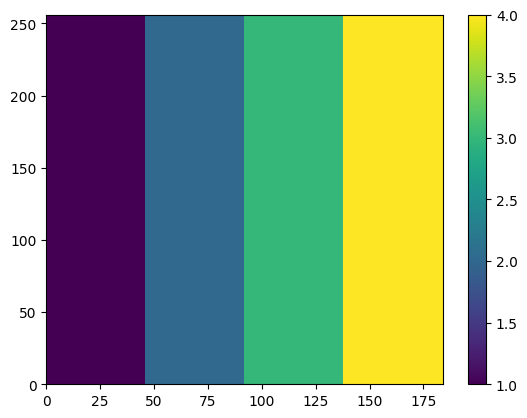

In [33]:
plt.pcolor(arr2)
plt.colorbar()
plt.show()

In [25]:
arr3 = np.hstack((arr[0,0],arr[1,0],arr[2,0],arr[3,0]))

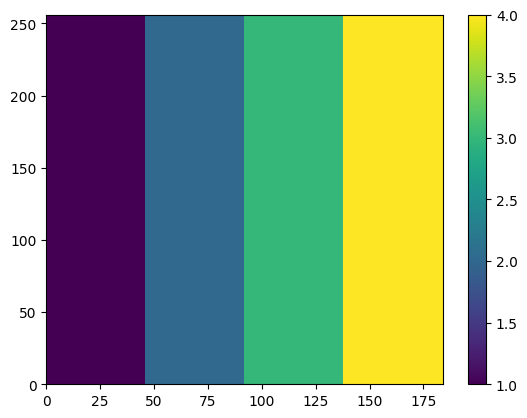

In [26]:
plt.pcolor(arr3)
plt.colorbar()
plt.show()

In [35]:
np.all(arr2==arr3)

True

In [38]:
np.array([2,0]).astype(bool)

array([ True, False])